<a href="https://colab.research.google.com/github/FelipeVillegasH/Sales_Prediction_Project_CodingDojo/blob/main/Sales_Prediction_Part5_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sales Prediction Project Part 2 Data Cleaning 
## By Felipe Villegas
### Created: 15.01.2022
#### Description: Data Cleaning and preliminary Statistical analysis of a food company database. 

In [544]:
import pandas as pd
import numpy as np

In [545]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [546]:
#spdf stands for: sales prediction data frame
spdf=pd.read_csv('/content/drive/MyDrive/CodingDojo/Proyectos/sales_predictions.csv')

In [547]:
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [548]:
spdf.info()
# note:  Item_Weight and Outlet_Size lack data 
spdf[['Outlet_Size','Item_Weight']].isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Outlet_Size,Item_Weight
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
8518,False,False
8519,True,False
8520,False,False
8521,False,False


In [549]:
# using loc we locate the NaN values of the variables in order to do a more descriptive analysis
# we do this first by generating variables of the NaN values for each respective column of analysis 
#Outlet_Size_NaN= spdf['Outlet_Size']=='NaN'
#Item_Weight_NaN= spdf['Item_Weight']=='NaN'
# then we locate the NaN values by using those filters in a loc function (do not forget that in .loc we do not use '' for the filter terms)
#NaN_Values= spdf.loc[Outlet_Size_NaN & Item_Weight_NaN,:]
#NaN_Values
# Note, this method didnt work cause it is intend to operate with operators, and since here we are analysing NaN values, we cannot opperate, and therefore 
# we cannot get an answer. 

In [550]:
# Using Logical operators we can print the NaN Values for the two Columns
#Outlet_Size_NaN= spdf['Outlet_Size']=='NaN'
#Item_Weight_NaN= spdf['Item_Weight']=='NaN'
#NaN_Values= spdf[(Outlet_Size_NaN)&(Item_Weight_NaN)]
#NaN_Values

In [551]:
spdf[spdf['Outlet_Size'].isna()]
# we locate the NaN values for the variable with .isna 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [552]:
spdf[spdf['Item_Weight'].isna()]
# we locate the NaN values for the variable with .isna 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [553]:
spdf['Outlet_Size'].isna().sum()

2410

In [554]:
spdf['Item_Weight'].isna().sum()

1463

In [555]:
# NaN Percentage for each variable: 
Item_Weight_NaN_Percentage= spdf['Item_Weight'].isna().sum()/len(spdf['Item_Weight'])
Item_Weight_NaN_Percentage*100

17.165317376510618

In [556]:
Outlet_Size_NaN_Percentage= spdf['Outlet_Size'].isna().sum()/len(spdf['Outlet_Size'])
Outlet_Size_NaN_Percentage*100

28.27642848762173

Therefore we should not just delete the columns because, the percentage of NaN values in the columns its not higher than 30%, also, the item weight are variables that could define if a product sales different regarding on their format and the Outlet size could be also used to segmentate productos by the store type so we strongly encourage not to delete the columns and niether promediate or add random values in the blank spots hence it could skew further analysis

In conclusion, we will generate an observation for the NaN spots in the variables (columns) so then, we can manage that data related on the item size or the outlet size they lack to to further analysis with products that do not consider this data.This could be usefull in general analysis on predicting tendecies on completely new products. we will do this by replacing the NaN Values on each variable with: the observation: No_Item_Weight and No_Outlet_Size respectively 

Aditional reazons for this Desition: 
we have also analysed the column **Outlet_Identifier** in order to try to find if an outlet lacking it's size, also has this data in another entry by looking for it by it's **Outlet_Identifier** but this was not the case so we could not assign an outlet size depending on it's Identifier. we tried this also with the **Outlet_Type** and didn't work 
we also tried this method of assigning observation based in other variables with similar data on the Item_Size, but there was no related data that we could link to assing to the NaN observations. 

In [557]:
# we proceed to replace the NaN spots (Outlet_Size):
spdf['Outlet_Size']=spdf['Outlet_Size'].fillna('No_Outlet_Size')

In [558]:
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No_Outlet_Size,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [559]:
spdf.info()
# here we confirm if the corrections were made by matching the non-null counts on every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [560]:
Item_Weight_Analysis=spdf.groupby(['Item_Weight'])[['Item_Outlet_Sales']].mean()
Item_Weight_Analysis

,Item_Outlet_Sales
Item_Weight,
4.555,1761.706800
4.590,1267.683200
4.610,1993.595429
4.615,4078.025000
4.635,2184.489800
...,...
21.000,1194.778100
21.100,1851.472306
21.200,2763.735800


In [561]:
Item_Weight_Analysis=Item_Weight_Analysis.sort_values(by=['Item_Outlet_Sales'],ascending=[False])
Item_Weight_Analysis
# In general terms we can affirm that on average the most items sold are those of 5.9 in weight 

,Item_Outlet_Sales
Item_Weight,
5.905,5305.094400
5.845,4701.879600
8.000,4648.171733
8.050,4460.443875
5.695,4413.207743
...,...
6.905,456.738800
5.925,455.007720
6.400,371.516400


In [562]:
spdf.describe()
# Also these are the main quick statistical summaries that we could use to analyse our data forehand

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [563]:
Item_Fat_Content_Analysis=spdf.groupby(['Item_Fat_Content']).sum()
Item_Fat_Content_Analysis
# we also realized that in order to clean our data we should Homologate similar terms in order to regularize the data 
# such as we see in the following dataframe the Item_Fat_Content expresses the same fat level in different terms which tend to skew or data
# therefore we use .... to fix this

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,3328.835,21.054330,43857.1062,631348,6.552424e+05
Low Fat,54687.900,326.541080,717390.8394,10167044,1.101503e+07
Regular,30341.545,200.970026,409413.1214,5771667,6.457454e+06
low fat,1055.375,7.313655,15071.7328,223539,2.338270e+05
reg,1361.320,7.764190,15948.6810,233923,2.295765e+05


In [564]:
# we homologate the similar names of the observations with the method .replace and by calling the columns with []
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('LF', 'Low Fat')
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('reg', 'Regular')
spdf['Item_Fat_Content']= spdf['Item_Fat_Content'].replace('low fat', 'Low Fat')


In [565]:
Item_Fat_Content_Analysis=spdf.groupby(['Item_Fat_Content']).sum()
Item_Fat_Content_Analysis
# finally we check that the homologation went well and so we can confirm that our data is clean and ready to be analysed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,59072.110,354.909065,776319.6784,11021931,1.190409e+07
Regular,31702.865,208.734216,425361.8024,6005590,6.687031e+06


In [566]:
item_weight_analysis=spdf.groupby(['Item_Identifier'])['Item_Weight'].unique()
print(item_weight_analysis)
# with this groupby analysis we realize that we could actualy complete the item weight based on the item identifier

Item_Identifier
DRA12          [11.6]
DRA24    [19.35, nan]
DRA59     [8.27, nan]
DRB01     [7.39, nan]
DRB13         [6.115]
             ...     
NCZ30     [6.59, nan]
NCZ41         [19.85]
NCZ42          [10.5]
NCZ53      [9.6, nan]
NCZ54    [14.65, nan]
Name: Item_Weight, Length: 1559, dtype: object


In [567]:
# Thus we code the following to fill the observations without weight 
Item_weight_fill = spdf[['Item_Identifier','Item_Weight']].dropna().drop_duplicates()
# rewrite the data frame spdf
spdf=spdf[['Item_Identifier',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',	'Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type',	'Item_Outlet_Sales']].merge(Item_weight_fill)
spdf=spdf[['Item_Identifier',	'Item_Weight', 'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',	'Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type',	'Item_Outlet_Sales']]


spdf.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [568]:
# then we proceed to check if the values were assigned correctly
item_weight_analysis=spdf.groupby(['Item_Identifier'])['Item_Weight'].unique()
print(item_weight_analysis)

Item_Identifier
DRA12     [11.6]
DRA24    [19.35]
DRA59     [8.27]
DRB01     [7.39]
DRB13    [6.115]
          ...   
NCZ30     [6.59]
NCZ41    [19.85]
NCZ42     [10.5]
NCZ53      [9.6]
NCZ54    [14.65]
Name: Item_Weight, Length: 1555, dtype: object


In [569]:
# we realize that in order to do an accurate heatmap we need to eliminate the items with cero visibility which are not on sale anymore
missing = spdf["Item_Visibility"] == 0
spdf.loc[missing, :].head()
spdf.drop(spdf.loc[spdf["Item_Visibility"]==0].index, inplace=True)

In [570]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7993 entries, 0 to 8518
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 811.8+ KB


#Graphical Analysis

In [571]:
import matplotlib.pyplot as plt
!pip install mplcyberpunk
import mplcyberpunk
import numpy as np
import seaborn as sns

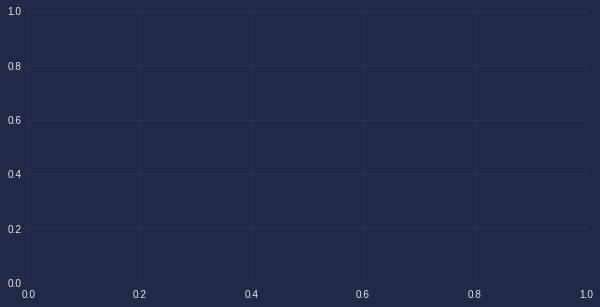

In [572]:
# Style Setup
plt.style.use("cyberpunk")
mplcyberpunk.add_glow_effects()
# We also set the fundamental parameters for all of our graphics
# Size: 
plt.rcParams['figure.figsize'] = (10, 8)

In [573]:
# hereby we would like to prove if the products with the oldest establishment year are the ones with the more sales 
Year_of_stablishment_Sales= spdf.groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].sum()
Year_of_stablishment_Sales

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3.393040e+06
1987,2.002286e+06
1997,1.989434e+06
1998,1.770575e+05
1999,2.063804e+06
2002,1.888582e+06
2004,2.140235e+06
2007,2.037795e+06
2009,1.720256e+06


Text(0.5, 1.0, 'Outlet Average Sales by Establishment Year')

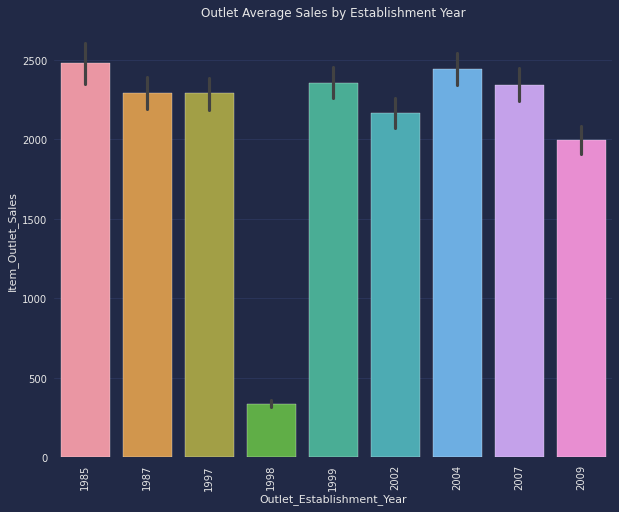

In [574]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=spdf);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Outlet Average Sales by Establishment Year')
# Hypothesis rejected, there is no tendency shown that the establishment year is directly related to the number of sales with a 95% confidence interval

<Figure size 720x576 with 0 Axes>

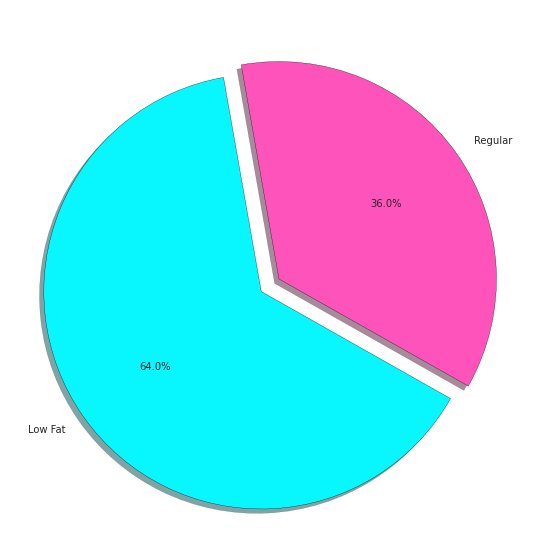

In [575]:
from IPython.core.pylabtools import figsize
# With this graph we intent to understand which products present the more average sales based on its fat content
plt.tight_layout()
# the first value represents the width ant the second the height, make sure to do this before the coding 
plt.figure(figsize=(10,10));
slices=(Item_Fat_Content_Analysis['Item_Outlet_Sales'])
labels=['Low Fat','Regular']
explode=[0.1,0]
plt.pie(x=slices,labels=labels,shadow=True, explode=explode, startangle=100, 
        # to set the edges of the slices color
        wedgeprops={'edgecolor':'black'}, 
        # to set the percentages on the slices
        autopct='%1.1f%%');
# ax1.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
# No se ejecuta el titulo en el grafico por eso lo comento
# plt.title('Outlet Sales by Fat Content')
# we conclude that there is a tendecy of higher sales of Low Fat products

In [576]:
# first we set up the groupby:
Sales_by_type= spdf.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean()
Sales_by_type

,Item_Outlet_Sales
Item_Type,
Baking Goods,1982.524568
Breads,2174.494264
Breakfast,2119.764084
Canned,2223.455313
Dairy,2231.381587
Frozen Foods,2132.299030
Fruits and Vegetables,2267.640951
Hard Drinks,2140.263106
Health and Hygiene,2002.748274


Text(0.5, 1.0, 'Outlet Average Sales by Type')

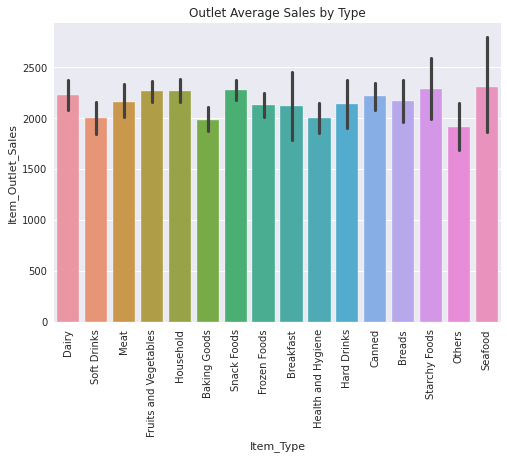

In [577]:
# The most sold products by its type
import seaborn as sns
plt.style.use('seaborn')
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=spdf);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Outlet Average Sales by Type')
# in average the most sold product type is Starchy Foods while the less sold product type is Others each one with at a 95% confidence interval

# **Part 4:** Graphical analysis to understand the features of the products and the stablishments to improve the sales.


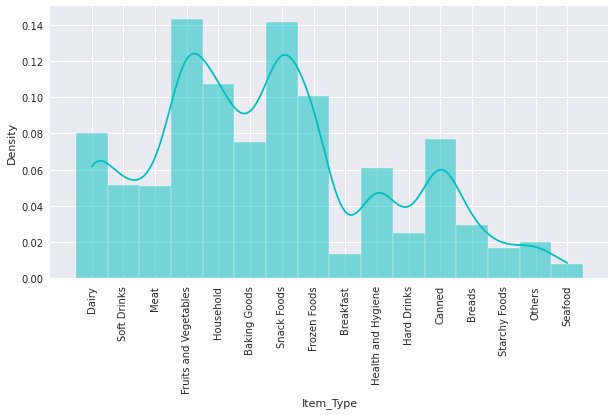

In [578]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import figure
# the dark grid style helps us to draw the array lines for each axle 
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)
sns.histplot(data=spdf, x='Item_Type',
             color='c',
             bins=10,
             kde=True, # kde helps us to mark a Gauss distribution line
             # binwidth=2
             # binrange=5
             stat='density' # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             );
plt.xticks(rotation=90);
# therefore approximately the 30% of the goods sold by all the stores is made up of the Fruits and vegetables and by the Snacks 
# Hence we should to further analysis regarding the profits to understand if we should modify this density, giving priority to stock the stores
# with the most profitable products.
# note that this does not mean that these are the productos with more sales, but the ones more stocked in the Shops

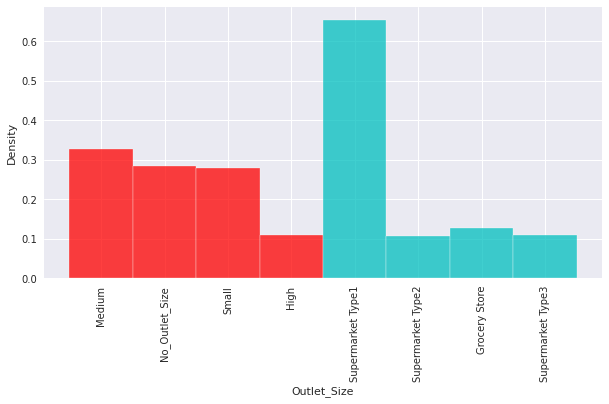

In [579]:
sns.histplot(data=spdf, x='Outlet_Size',
             color='r',
             bins=5,
             kde=False, # kde helps us to mark a Gauss distribution line
             stat='density', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);
sns.histplot(data=spdf, x='Outlet_Type',
             color='c',
             bins=5,
             kde=False, # kde helps us to mark a Gauss distribution line
             stat='density', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);
# We can conclude that more than the 60% of the Stores are Supermarkets type 1, in the other hand we cannot conclude 

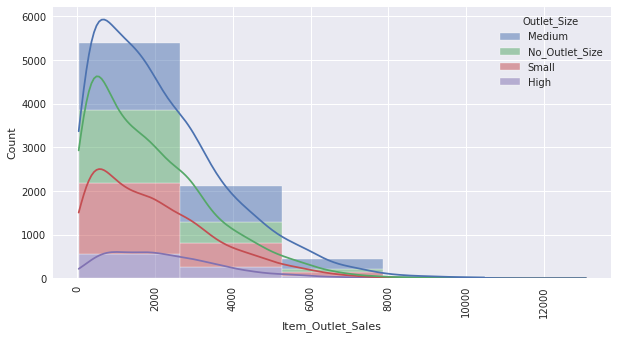

In [580]:
sns.histplot(data=spdf, x='Item_Outlet_Sales',
             hue='Outlet_Size',
             color='r',
             bins=5,
             kde=True, # kde helps us to mark a Gauss distribution line
             stat='count', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);

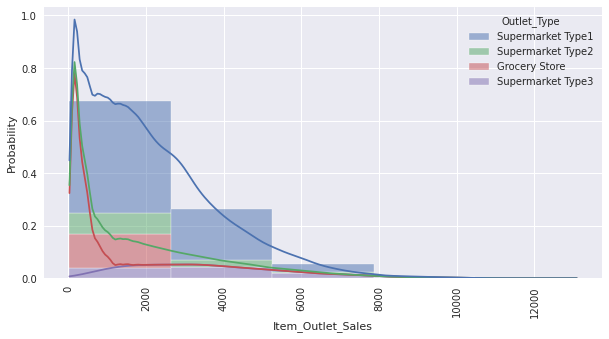

In [581]:
sns.histplot(data=spdf, x='Item_Outlet_Sales',
             hue='Outlet_Type',
             color='r',
             bins=5,
             kde=True, # kde helps us to mark a Gauss distribution line
             stat='probability', # the area of the histogram sums to one , with the probability Stat the only change is that the sum of the Height but not the area sums to one
             multiple='stack'
             );
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


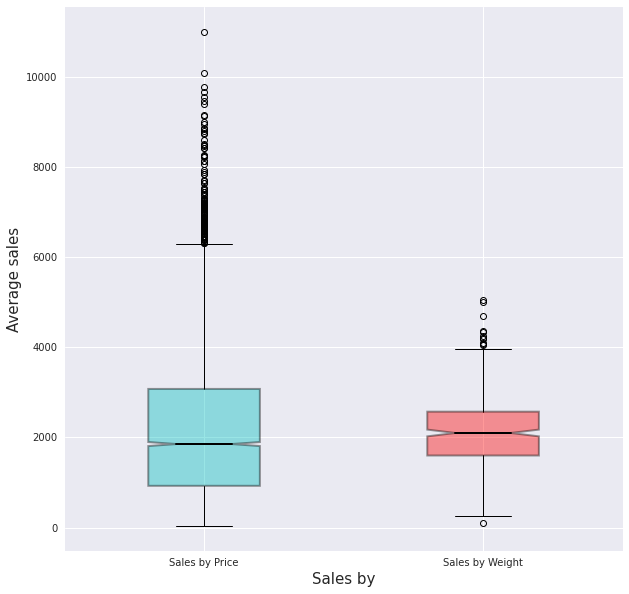

In [582]:
Average_Sales_by_fatcontent=spdf.groupby(['Item_MRP'])[['Item_Outlet_Sales']].mean()
Average_sales_by_Weight=spdf.groupby(['Item_Weight'])[['Item_Outlet_Sales']].mean()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
boxplots = axes.boxplot([Average_Sales_by_fatcontent, Average_sales_by_Weight], 
             notch = True, #muesca
             labels=['Sales by Price', 'Sales by Weight'],
             widths = .4,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='k'),
             boxprops = dict(linestyle='=', linewidth=2, color='Black', facecolor = 'c', alpha = .4));
boxplot1 = boxplots['boxes'][1]
boxplot1.set_facecolor('red')
plt.xlabel('Sales by', fontsize = 15);
plt.ylabel('Average sales', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [583]:
spdf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018580,0.026995,-0.018205,0.012942
Item_Visibility,-0.018580,1.000000,-0.005552,-0.080434,-0.138199
Item_MRP,0.026995,-0.005552,1.000000,0.002813,0.567319
Outlet_Establishment_Year,-0.018205,-0.080434,0.002813,1.000000,-0.048176
Item_Outlet_Sales,0.012942,-0.138199,0.567319,-0.048176,1.000000


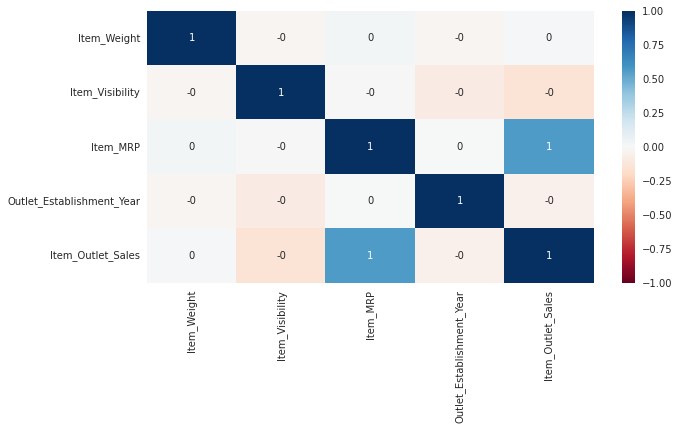

In [584]:
sns.heatmap(spdf.corr(),
            cmap='RdBu',
            vmin=-1,
            annot=True, # this works to show the values in the heatmap
            fmt='.0f',
            vmax=1);
# with this heatmap we can mainly appreciate the relationship between the variables, the main conclutions that we can obtain from this 
# come from assigning directly or inversely proportions between the relations 
# for instancethe Item Outlet sales certainly is inversely proportional to the Item price
# and allegedly the item visibility is not a defining variable to the sales

In [585]:
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,No_Outlet_Size,Tier 2,Supermarket Type1,5976.2208
2,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
3,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,No_Outlet_Size,Tier 3,Grocery Store,498.0184


In [586]:
spdf.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Sales Predictions 

In [587]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
# These are the sklearn sections of the library to be used to meassure the performance of our prediction in linear regresion
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Linear Regression only considering the Quantitative Features

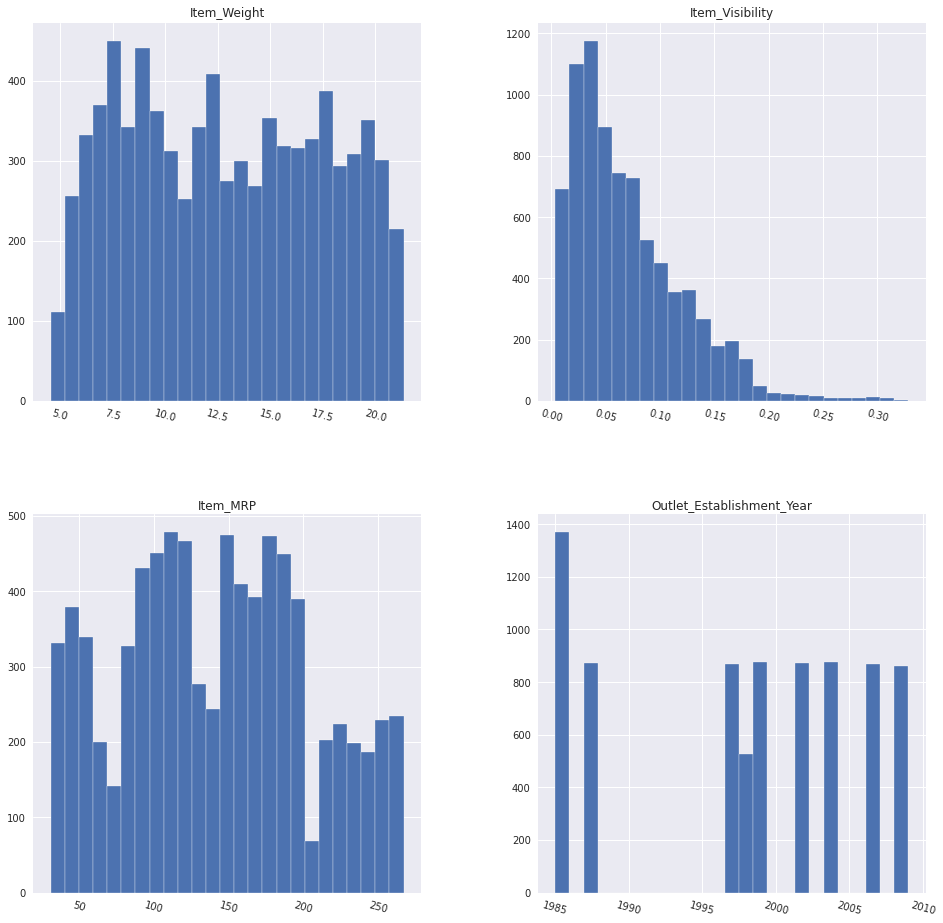

In [588]:
XQuantitative = spdf.loc[:, ['Item_Weight',	'Item_Visibility',	'Item_MRP',	'Outlet_Establishment_Year']]
XQuantitative.dropna(inplace=True)
XQuantitative.isna().sum()
XQuantitative.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);
# since there are not actually infinite and NaN values


In [589]:
XQuantitative = spdf.loc[:, ['Item_Weight','Item_Visibility',	'Item_MRP',	'Outlet_Establishment_Year']].to_numpy()
XQuantitative.shape

(7993, 4)

In [590]:
yQuantitative = spdf.loc[:, 'Item_Outlet_Sales'].to_numpy()
yQuantitative.shape

(7993,)

In [591]:
np.any(np.isnan(XQuantitative))
np.all(np.isfinite(XQuantitative))

True

In [592]:
def clean_dataset(spdf):
    assert isinstance(spdf, pd.DataFrame), "df needs to be a pd.DataFrame"
    spdf.dropna(inplace=True)
    indices_to_keep = ~spdf.isin([np.nan, np.inf, -np.inf]).any(1)
    return spdf[indices_to_keep].astype(np.float64)
spdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7993 entries, 0 to 8518
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7993 non-null   object 
 1   Item_Weight                7993 non-null   float64
 2   Item_Fat_Content           7993 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  7993 non-null   object 
 5   Item_MRP                   7993 non-null   float64
 6   Outlet_Identifier          7993 non-null   object 
 7   Outlet_Establishment_Year  7993 non-null   int64  
 8   Outlet_Size                7993 non-null   object 
 9   Outlet_Location_Type       7993 non-null   object 
 10  Outlet_Type                7993 non-null   object 
 11  Item_Outlet_Sales          7993 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [593]:
spdf['Item_Weight'].describe()

count    7993.000000
mean       12.903785
std         4.646397
min         4.555000
25%         8.850000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [594]:
# Create the instance 
QuantitativeRegression = LinearRegression(fit_intercept=True)


In [595]:
# then execute the model for it to learn about the relation between X and y 
QuantitativeRegression.fit(XQuantitative, yQuantitative)

LinearRegression()

In [596]:
QuantitativeRegression.predict(XQuantitative[0].reshape(-1,4))

array([4116.87761587])

In [597]:
QuantitativeRegression.predict(XQuantitative[0:10])

array([4116.87761587, 4085.66490136, 4034.50781756, 3988.95184676,
       4064.23821077, 4279.03667528, 4287.18496043, 4001.33358622,
        854.64484099,  891.84979721])

In [598]:
QuantitativeRegressionscore = QuantitativeRegression.score(XQuantitative, yQuantitative)
print(QuantitativeRegressionscore)

0.34382706761534165


#KNN Regression only considering Quantitative Features

In [599]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XQuantitative)
# Transform 
XQuantitative = scaler.transform(XQuantitative);

In [600]:
# We assign the KNN model to a variable
KnnQuantitative = KNeighborsRegressor(n_neighbors=5)
print(KnnQuantitative)

KNeighborsRegressor()


In [601]:
# Training the prediction model
KnnQuantitative.fit(XQuantitative, yQuantitative)

KNeighborsRegressor()

In [602]:
QuantitativePredictions= KnnQuantitative.predict(XQuantitative)
QuantitativePredictions

array([1485.53296, 5053.422  , 5220.00516, ..., 3818.363  , 1844.13284,
       2113.64868])

In [603]:
score2 = KnnQuantitative.score(XQuantitative, yQuantitative)
score2
# only by analysing the Quantitative variables, the KNN model is more accurate to predict 

0.503291202958107

# Categorical Analysis

In [604]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing  import OneHotEncoder, OrdinalEncoder

In [605]:
!pip install category_encoders
import category_encoders as ce

In [606]:
# We start by Assigning vectors to the categorical features: 
XCategorical = spdf.loc[:, ['Item_Fat_Content',	'Item_Type',	'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].values
XCategorical.shape

(7993, 6)

In [607]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
XoheCategorical = ohe.fit_transform(XCategorical)
XoheCategorical.head()

,0_Low Fat,0_Regular,1_Dairy,1_Soft Drinks,1_Meat,1_Fruits and Vegetables,1_Household,1_Baking Goods,1_Snack Foods,1_Frozen Foods,1_Breakfast,1_Health and Hygiene,1_Hard Drinks,1_Canned,1_Breads,1_Starchy Foods,1_Others,1_Seafood,2_OUT049,2_OUT045,2_OUT035,2_OUT018,2_OUT010,2_OUT013,2_OUT027,2_OUT017,2_OUT046,2_OUT019,3_Medium,3_No_Outlet_Size,3_Small,3_High,4_Tier 1,4_Tier 2,4_Tier 3,5_Supermarket Type1,5_Supermarket Type2,5_Grocery Store,5_Supermarket Type3
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [608]:
# we scalate
scaler = StandardScaler()
scaler.fit(XoheCategorical)
# Transform 
XoheCategorical = scaler.transform(XoheCategorical);

In [609]:
KnnCategorical = KNeighborsRegressor(n_neighbors=5)
print(KnnCategorical)

KNeighborsRegressor()


In [610]:
KnnCategorical.fit(XoheCategorical, yQuantitative)

KNeighborsRegressor()

In [611]:
CategoricalPredictions= KnnCategorical.predict(XoheCategorical)
CategoricalPredictions

array([2532.0374 , 2192.74572, 3721.822  , ..., 3212.75132, 3518.0872 ,
       1443.58756])

In [612]:
score3 = KnnCategorical.score(XoheCategorical, yQuantitative)
score3

0.19546972549763642

# All Feature Prediction:

In [613]:
Categorical = spdf.loc[:, ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
Categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,Low Fat,Dairy,2002,No_Outlet_Size,Tier 2,Supermarket Type1
2,Low Fat,Dairy,2004,Small,Tier 2,Supermarket Type1
3,Low Fat,Dairy,2009,Medium,Tier 3,Supermarket Type2
4,Low Fat,Dairy,1998,No_Outlet_Size,Tier 3,Grocery Store


In [614]:
Categorical.to_numpy()

array([['Low Fat', 'Dairy', 1999, 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ['Low Fat', 'Dairy', 2002, 'No_Outlet_Size', 'Tier 2',
        'Supermarket Type1'],
       ['Low Fat', 'Dairy', 2004, 'Small', 'Tier 2', 'Supermarket Type1'],
       ...,
       ['Low Fat', 'Household', 2004, 'Small', 'Tier 2',
        'Supermarket Type1'],
       ['Low Fat', 'Health and Hygiene', 1999, 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ['Low Fat', 'Health and Hygiene', 2002, 'No_Outlet_Size',
        'Tier 2', 'Supermarket Type1']], dtype=object)

In [615]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
OheCat = ohe.fit_transform(Categorical)
OheCat.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_No_Outlet_Size,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1999,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,0,0,1,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,0,0,0,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,0,1,0,0,0,0,1,0,0,1,0


In [616]:
Numerical = spdf.loc[:, ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Item_Outlet_Sales']]
Numerical.head()
Numerical.shape

(7993, 6)

In [617]:
OheCat['tmp'] = 1
Numerical['tmp'] = 1

In [618]:
Predictions = pd.concat([OheCat, Numerical],axis=1)
print(Predictions)

      Item_Fat_Content_Low Fat  ...  tmp
0                            1  ...    1
1                            1  ...    1
2                            1  ...    1
3                            1  ...    1
4                            1  ...    1
...                        ...  ...  ...
8514                         1  ...    1
8515                         1  ...    1
8516                         1  ...    1
8517                         1  ...    1
8518                         1  ...    1

[7993 rows x 38 columns]


In [619]:
Predictions.fillna(999, inplace=True)
Predictions.isna().sum()

Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Outlet_Establishment_Year          0
Outlet_Size_Medium                 0
Outlet_Size_No_Outlet_Size         0
Outlet_Size_Small                  0
Outlet_Size_High                   0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Supermarket Type1      0
O

In [620]:
Predictions = pd.DataFrame(Predictions)
Predictions = Predictions.drop(columns=['tmp'])
Predictions.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_No_Outlet_Size,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1999,1,0,0,0,1,0,0,1,0,0,0,FDA15,9.3,0.016047,249.8092,OUT049,3735.1380
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,0,1,0,0,0,1,0,1,0,0,0,FDA15,9.3,0.016055,250.2092,OUT045,5976.2208
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,0,0,1,0,0,1,0,1,0,0,0,FDA15,9.3,0.016019,248.5092,OUT035,6474.2392
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,0,0,0,0,0,1,0,1,0,0,FDA15,9.3,0.016088,249.6092,OUT018,5976.2208
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,0,1,0,0,0,0,1,0,0,1,0,FDA15,9.3,0.026818,248.9092,OUT010,498.0184


In [621]:
y = Predictions.loc[:, 'Item_Outlet_Sales'].values
y.shape

(7993,)

In [622]:
X = Predictions.loc[:, ['Item_Fat_Content_Low Fat',	'Item_Fat_Content_Regular',	'Item_Type_Dairy',	'Item_Type_Soft Drinks',	'Item_Type_Meat',	'Item_Type_Fruits and Vegetables',	'Item_Type_Household',	'Item_Type_Baking Goods',	'Item_Type_Snack Foods',	'Item_Type_Frozen Foods',	'Item_Type_Breakfast',	'Item_Type_Health and Hygiene',	'Item_Type_Hard Drinks',	'Item_Type_Canned',	'Item_Type_Breads',	'Item_Type_Starchy Foods',	'Item_Type_Others',	'Item_Type_Seafood',	'Outlet_Establishment_Year',	'Outlet_Size_Medium',	'Outlet_Size_No_Outlet_Size',	'Outlet_Size_Small',	'Outlet_Size_High',	'Outlet_Location_Type_Tier 1',	'Outlet_Location_Type_Tier 2',	'Outlet_Location_Type_Tier 3',	'Outlet_Type_Supermarket Type1',	'Outlet_Type_Supermarket Type2',	'Outlet_Type_Grocery Store',	'Outlet_Type_Supermarket Type3',	'Item_Weight',	'Item_Visibility',	'Item_MRP']].to_numpy()
X.shape


(7993, 33)

In [623]:
scaler.fit(X)
X = scaler.transform(X)

In [624]:
KnnAllVariables = KNeighborsRegressor()

In [625]:
KnnAllVariables.fit(X, y)

KNeighborsRegressor()

In [626]:
Predicted= KnnAllVariables.predict(X)
Predicted

array([2995.96684, 3744.19288, 5229.06004, ..., 3517.95404, 1806.04908,
       1977.15968])

In [627]:
ScoreAllVariables = KnnAllVariables.score(X, y)
print(ScoreAllVariables)
# with this score we can concluthe that the Knn Model is 65% accurate to predict the item price considering the years as observations and all the features in the data frame
# therefore this model is better than the ones that only used categorical or numerical features excluding each other. 

0.6510315404802323


In [628]:
np.sqrt(mean_squared_error(y, Predicted))
# the model presents an absolute error of 1007 units

1006.6914629279433

# Variable Evaluation

In [629]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# since R squared(coefitient of determination ) is the proportion of variance on the dependent variable which is predictable from the independent variables

In [630]:
Predictions_nice = Predictions.loc[:,['Item_Fat_Content_Low Fat',	'Item_Fat_Content_Regular',	'Item_Type_Dairy',	'Item_Type_Soft Drinks',	'Item_Type_Meat',	'Item_Type_Fruits and Vegetables',	'Item_Type_Household',	'Item_Type_Baking Goods',	'Item_Type_Snack Foods',	'Item_Type_Frozen Foods',	'Item_Type_Breakfast',	'Item_Type_Health and Hygiene',	'Item_Type_Hard Drinks',	'Item_Type_Canned',	'Item_Type_Breads',	'Item_Type_Starchy Foods',	'Item_Type_Others',	'Item_Type_Seafood',	'Outlet_Establishment_Year',	'Outlet_Size_Medium',	'Outlet_Size_No_Outlet_Size',	'Outlet_Size_Small',	'Outlet_Size_High',	'Outlet_Location_Type_Tier 1',	'Outlet_Location_Type_Tier 2',	'Outlet_Location_Type_Tier 3',	'Outlet_Type_Supermarket Type1',	'Outlet_Type_Supermarket Type2',	'Outlet_Type_Grocery Store',	'Outlet_Type_Supermarket Type3',	'Item_Weight',	'Item_Visibility',	'Item_MRP']]

In [631]:
Predictions_nice = Predictions.set_axis(['Item_Fat_Content_Low_Fat',	'Item_Fat_Content_Regular',	'Item_Type_Dairy',	'Item_Type_Soft_Drinks',	'Item_Type_Meat',	'Item_Type_Fruits_and_Vegetables',	'Item_Type_Household',	'Item_Type_Baking_Goods',	'Item_Type_Snack_Foods',	'Item_Type_Frozen_Foods',	'Item_Type_Breakfast',	'Item_Type_Health_and_Hygiene',	'Item_Type_Hard_Drinks',	'Item_Type_Canned',	'Item_Type_Breads',	'Item_Type_Starchy_Foods',	'Item_Type_Others',	'Item_Type_Seafood',	'Outlet_Establishment_Year',	'Outlet_Size_Medium',	'Outlet_Size_No_Outlet_Size',	'Outlet_Size_Small',	'Outlet_Size_High',	'Outlet_Location_Type_Tier_1',	'Outlet_Location_Type_Tier_2',	'Outlet_Location_Type_Tier_3',	'Outlet_Type_Supermarket_Type1',	'Outlet_Type_Supermarket_Type2',	'Outlet_Type_Grocery_Store',	'Outlet_Type_Supermarket_Type3',	'Item_Weight',	'Item_Visibility',	'Item_MRP', 'Item_MRP', 'Item_MRP', 'Item_MRP'], axis=1, inplace=False)
Predictions_nice.head()

,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Dairy,Item_Type_Soft_Drinks,Item_Type_Meat,Item_Type_Fruits_and_Vegetables,Item_Type_Household,Item_Type_Baking_Goods,Item_Type_Snack_Foods,Item_Type_Frozen_Foods,Item_Type_Breakfast,Item_Type_Health_and_Hygiene,Item_Type_Hard_Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy_Foods,Item_Type_Others,Item_Type_Seafood,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_No_Outlet_Size,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type3,Item_Weight,Item_Visibility,Item_MRP,Item_MRP,Item_MRP,Item_MRP
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1999,1,0,0,0,1,0,0,1,0,0,0,FDA15,9.3,0.016047,249.8092,OUT049,3735.1380
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,0,1,0,0,0,1,0,1,0,0,0,FDA15,9.3,0.016055,250.2092,OUT045,5976.2208
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,0,0,1,0,0,1,0,1,0,0,0,FDA15,9.3,0.016019,248.5092,OUT035,6474.2392
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,0,0,0,0,0,1,0,1,0,0,FDA15,9.3,0.016088,249.6092,OUT018,5976.2208
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,0,1,0,0,0,0,1,0,0,1,0,FDA15,9.3,0.026818,248.9092,OUT010,498.0184


In [632]:
X= sm.add_constant(X)
model = sm.OLS(y, X)


In [633]:
results = model.fit()
results.params

array([ 2.17735324e+03,  4.26232988e+15,  4.26232988e+15,  4.94509697e+14,
        4.01548916e+14,  3.98764813e+14,  6.36957236e+14,  5.63104231e+14,
        4.79816859e+14,  6.33697970e+14,  5.46874814e+14,  2.08951711e+14,
        4.34905016e+14,  2.81899746e+14,  4.84904154e+14,  3.06504222e+14,
        2.32574850e+14,  2.53872700e+14,  1.56935071e+14,  3.05923260e+02,
       -1.24357004e+14, -1.19493894e+14, -1.19108199e+14, -8.26988153e+13,
        2.28517350e+14,  2.38648939e+14,  2.48309632e+14,  7.11350365e+13,
        4.64385069e+13,  4.99899026e+13,  4.66505556e+13, -4.71002504e+00,
       -1.09237816e+01,  9.68181165e+02])

In [634]:
# Since 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     369.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:39:16   Log-Likelihood:                -67491.
No. Observations:                7993   AIC:                         1.350e+05
Df Residuals:                    7964   BIC:                         1.352e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2177.3532     12.613    172.630      0.0

We can conclude The features associated the most with the price predicction by adressing the t column in this analysis the higher value corresponds to the X33 which is Item MRP and therefore that is the most relevant feature to the predictions.